In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

import os

In [103]:
def draw_plot():

    # Return CSIRO Predicted Sea Level Data
    def getData(dt):
        slope, intercept, r_value, p_value, std_err = linregress(dt.index, dt)
        year = np.arange(dt.index.min(), 2050, 1)
        data = pd.DataFrame(intercept + slope * year,
                            index=year,  columns=['data'])

        return data, slope, intercept, r_value

    # Read data from file
    df = pd.read_csv(os.getcwd() + '/epa-sea-level.csv', index_col='Year')

    # Create plot playground
    plt.figure(1, figsize=(12, 8))
    ax = plt.subplot()

    # Create scatter plot
    Sea_Level_Data = df['CSIRO Adjusted Sea Level']
    ax.scatter(Sea_Level_Data.index, Sea_Level_Data)

    # Create first line of best fit
    Predict_Sea_Level_Data = df['CSIRO Adjusted Sea Level']
    data, slope, intercept, r_value = getData(Predict_Sea_Level_Data)
    plt.plot(data.index, data['data'], label='Best Fit Line 1: $%.2fx + %.2f$, $R^2=%.2f$' %
            (slope, intercept, r_value ** 2))

    # Create second line of best fit
    Latest_Predict_Sea_Level_Data = df[df.index >= 2000]['CSIRO Adjusted Sea Level'].dropna()
    data, slope, intercept, r_value = getData(Latest_Predict_Sea_Level_Data)
    plt.plot(data.index, data['data'], label='Best Fit Line 2: $%.2fx + %.2f$, $R^2=%.2f$' %
            (slope, intercept, r_value ** 2))

    # Draw plot
    plt.legend(loc='best')
    plt.title('Rise in Sea Level')
    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')
    plt.grid()

    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()


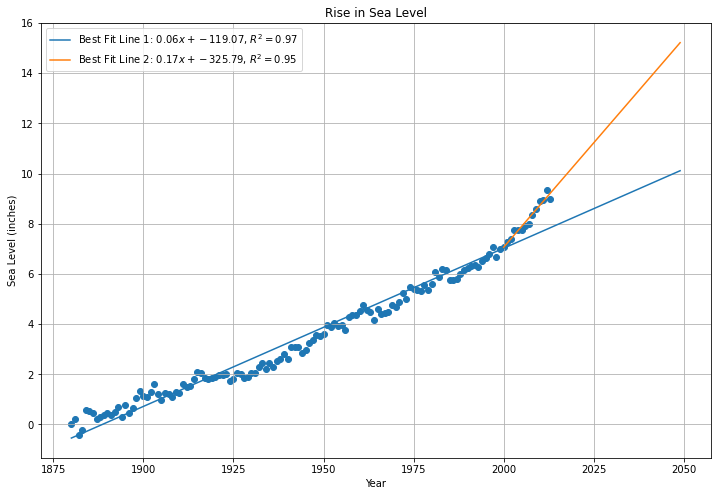

In [104]:
draw_plot()